# Section 2.5 — Continuous random variables

This notebook contains all the code examples from [Section 2.5 Continuous random variables]() of the **No Bullshit Guide to Statistics**.

Topics covered in this notebook:
- Definitions of continuous random variables
- Examples of random variables
- Probability calculations
- Computer models for random variables 
  - Overview of `scipy.stats` methods
- Real-world example to demo probability applications
- Discussion
  - Bulk and tails of a the normal distribution


#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

# %config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(3)

## Definitions


### Random variables

- *random variable* $X$:
  a quantity that can take on different values.
- **outcome**: a particular value $\{X = x\}$ or range of values $\{a \leq X \leq b\}$ that can occur as a result of observing the random variable $X$.
- **sample space** $\mathcal{X}$: describes the set of all possible outcomes of the random variable.
- $f_X$: the *probability distribution function*
  is a function that assigns probabilities to the different outcome in the sample space of a random variable.
  The probability distribution function of the random variable $X$
  is a function of the form $f_X: \mathcal{X} \to \mathbb{R}$.
- $F_X$:
  the *cumulative distribution function* (CDF) tells us the probability of an outcome
  less than or equal to a given value: $F_X(b) = Pr(\{ X \leq b \})$.
- $F_X^{-1}$:
  the inverse cumulative distribution function computes contains the information
  about the quantiles of the probability distribution.
  The value $F_X^{-1}(q)=x_q$ tells how far you need to go in the sample space
  so that the event $\{ X \leq x_q \}$ contains a proportion $q$ of the total probability:
  $\Pr(\{ X \leq x_q \})=q$.
- $\mathbb{E}_X[w]$:
  the *expected value* of the function $w(X)$
  computes the average value of $w(X)$ computed for all the possible values of the random variable $X$.





#### Example 1: Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(0,1)$ is described by the following probability density function:
$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$
where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U=u\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

**Computer simulation**

- The continuous uniform family of distribution $\mathcal{U}(\alpha,\beta)$,
  which assigns equal probabilities to all outcomes in the interval $[\alpha,\beta]$.
  To create a computer model for a continuous uniform distribution,
  use the code `uniform(alpha,beta)`,
  where `alpha` and `beta` are two floats.


We'll introduce computer models for random variables is [Section 2.1.5 — Computer models for random variables](#computer_models) below, but since we're looking at a notebook, we can show a little preview of the calculations you'll learn by the end of the section.

In [4]:
# define the computer model `rvU` for the random variable U
from scipy.stats import uniform
rvU = uniform(0, 1)

# use `quad` function to integrate rvU.pdf between 0.2 and 0.5
from scipy.integrate import quad
quad(rvU.pdf, 0.2, 0.5)[0]

0.3

#### Example 2: Normal distribution

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:
$$ \Large
    f_N(n) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(n-\mu)^2}{2\sigma^2}}.
$$

The mean $\mu$ (the Greek letter *mu*) and the standard deviation $\sigma$ (the Greek letter *sigma*) are called the parameters of the distribution.

The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions,
and $N \sim \mathcal{N}(1000, 100)$ is a particular instance of the distribution with mean $\mu = 1000$ and standard deviation $\sigma = 100$.

The code example below shows the calculation of the probability $\Pr\!\left( \{ 800 \leq N \leq 900 \} \right)$,
which corresponds to the integral $\int_{n=800}^{n=900} f_N(n) dn$.

In [5]:
# define the computer model `rvN` for the random variable N
from scipy.stats import norm
rvN = norm(1000, 100)

# use `quad` function to integrate rvN.pdf between 800 and 900
quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

## Calculations with random variables

### Example 1: mean and variance of the uniform distribution


#### Mean
\begin{align*}
    \mu_U = \mathbb{E}_U[U] 
        &=	\int_{-\infty}^{\infty}	u f_U(u) \; du		\\
        &=	\int_0^1 u f_U(u) \; du				\\
        &=	\int_0^1 u \cdot 1 \; du	= 	\tfrac{1}{2}.
\end{align*}

In [6]:
from sympy import symbols, integrate

u = symbols('u')
integrate(u * 1, (u,0,1))

1/2

So the mean is $\mu_U = \frac{1}{2} = 0.5$.

#### Variance

The formula for the variance is
$$
    \sigma_U^2
        = \mathbb{E}_U\!\left[ (U-\mu_U)^2 \right]
        = \int_0^1 (u- \tfrac{1}{2})^2 \cdot f_U(u) \; du.
$$

In [7]:
from sympy import symbols, integrate

u = symbols('u')
integrate( (u-1/2)**2 * 1, (u,0,1) )

0.0833333333333333

So the variance of $U$ is $\sigma_U^2 = \frac{1}{12} = 0.08\overline{3}$.

We can compute the standard deviation $\sigma_U$ by taking the square root of the variance.

In [8]:
import numpy as np
np.sqrt(0.0833333333333333)

0.2886751345948128

### Example 2: mean and variance of a normal distribution

$$
    p_N(n)
      = \tfrac{1}{\sigma\sqrt{2\pi}} e^{-\tfrac{(n-\mu)^2}{2\sigma^2}}
      = \tfrac{1}{100\sqrt{2\pi}} e^{-\tfrac{(n-1000)^2}{2\cdot100^2}}.
$$

In [9]:
import numpy as np

mu = 1000
sigma = 100

def fN(n):
    z = (n - mu)/sigma
    C = sigma * np.sqrt(2*np.pi)
    return 1 / C * np.exp(-1/2 * z**2)

The mean of $N$ is

In [10]:
from scipy.integrate import quad

def n_times_fN(n):
    return n * fN(n)

muN = quad(n_times_fN, -2000, 4000)[0]
muN

1000.0

The standard deviation of $N$ is

In [11]:
def n_minus_mu_sq_times_fN(n):
    return (n-muN)**2 * fN(n)

sigma_sq = quad(n_minus_mu_sq_times_fN, -2000, 4000)[0]
sigmaN = np.sqrt(sigma_sq)
sigmaN

100.00000000000001

### Skewness and kurtosis

In [12]:
from scipy.stats import norm

mu = 0     # position of the centre
sigma = 1  # dispersion
rvZ = norm(mu, sigma)

In [13]:
mean, var, skew, kurt = rvZ.stats(moments="mvsk")
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

<a name="computer_models"></a>

## Computer models for random variables

- `<model>`: the family of probability distributions
- `<params>`: parameters of the model—specific value of the control knobs we choose in the general family of distributions to create a particular distribution
- `<model>(<params>)`: a particular instance of probability model created by choosing a model family `<model>` and the model parameters `<params>`.
  - example 1: uniform family of distribution $\mathcal{U}(\alpha,\beta)$ with parameters $\alpha$ and $\beta$.  
  - example 2: normal family of distribution $\mathcal{N}(\mu,\sigma)$ with parameters $\mu$ and $\sigma$.
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \texttt{model}(\theta)$ means the random variable $X$
  is distributed according to model instance $\texttt{model}$ and parameters $\theta$.


In [14]:
from scipy.stats import norm

# create a normal random variable with mean 1000 and std 100
rvN = norm(1000, 100)

In [15]:
type(rvN)

scipy.stats._distn_infrastructure.rv_frozen

In [16]:
## see all attributes and methods:
# [attr for attr in dir(rvN) if "__" not in attr] 

### Plotting the probability functions

<AxesSubplot:>

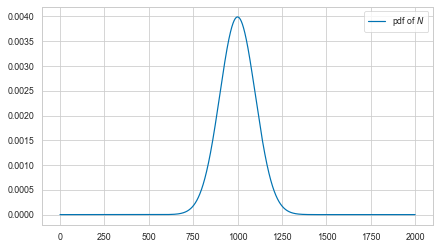

In [17]:
ns = np.linspace(0, 2000, 10000)
fNs = rvN.pdf(ns)
sns.lineplot(x=ns, y=fNs, label="pdf of $N$")

The cumulative distribution is the integral of the probability density function:
$$
   F_N(b) = \textrm{Pr}(N \leq b) = \int_{-\infty}^b f_N(n) \, dn
$$


<AxesSubplot:>

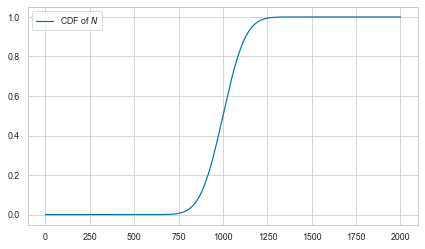

In [18]:
ns = np.linspace(0, 2000, 10000)
FNs = rvN.cdf(ns)
sns.lineplot(x=ns, y=FNs, label="CDF of $N$")

### Properties of the distribution

In [19]:
rvN.mean()

1000.0

In [20]:
rvN.std()

100.0

In [21]:
rvN.var()

10000.0

In [22]:
np.sqrt( rvN.var() )  # = rvN.std()

100.0

In [23]:
rvN.median()

1000.0

In [24]:
rvN.support()

(-inf, inf)

### Computing probabilities

Suppose you want to compute the probability of the outcome $\{ a \leq N \leq b \}$
for the random variable $N$.

In [25]:
# Pr({800 < N < 1200}) = integral of f_N between 800 and 1200
quad(rvN.pdf, 800, 1200)[0]

0.9544997361036417

In [26]:
# Pr({800 < N < 1200}) = F_N(1200) - F_N(800)
rvN.cdf(1200) - rvN.cdf(800)

0.9544997361036416

### Computing quantiles

The inverse question is to find the interval $(-\infty, n_q]$ that contains proportion $q$ of the total probability.

For example the $q=0.25$ quantile is located at

In [27]:
# first quartile
rvN.ppf(0.25)

932.5510249803918

In [28]:
# verify that Pr({N<=932.5510249803918)}) == 0.25
rvN.cdf(932.5510249803918)

0.25

In [29]:
# second quartile == median
rvN.ppf(0.5)

1000.0

In [30]:
# third quartile
rvN.ppf(0.75)

1067.4489750196083

#### Left tail

In [31]:
rvN.ppf(0.05)

835.5146373048527

#### Right tail

In [32]:
rvN.ppf(0.95)

1164.4853626951472

#### Computing confidence intervals

To compute a 90% confidence interval for the random variable $N$,
we can use the `rvN.interval()` method.

In [33]:
rvN.interval(0.90)

(835.5146373048527, 1164.4853626951472)

Note the method `rvN.interval(0.90)` is just a shortcut for computing `(rvN.ppf(0.05),rvN.ppf(0.95))`.

### Generating random observations

Let's say you want to generate $n=10$ observations from the random variable $N$.
You can do this by calling the method `rvN.rvs(n)`.

In [34]:
ns = rvN.rvs(10)
ns

array([1178.86284734, 1043.65098505, 1009.64974681,  813.65072966,
        972.26117975,  964.52410207,  991.72585185,  937.29993232,
        995.6181831 ,  952.27819696])

In [35]:
ns_mean = sum(ns) / len(ns)
ns_mean

985.9521754922469

### Computing expectations

Suppose the distributor accepts only bottles contain between 800 ml and 1200 ml,
and you'll receive a receive payment of $\$2$ for each bottle.
Bottles outside that range get rejected and you don't get paid for them.

In [36]:
def payment(n):
    if 800 <= n and n <= 1200:
        return 2
    else:
        return 0

In [37]:
# get paid if in spec
payment(1050)

2

In [38]:
# don't get paid if out of spec
payment(1250)

0

In [39]:
# expected value of payment
rvN.expect(payment, lb=0, ub=2000)

1.9089994722069916

Visually speaking, only parts of the probability mass of the random variable "count" towards the payment, the subset of the values inside the yellow region shown below.

<AxesSubplot:>

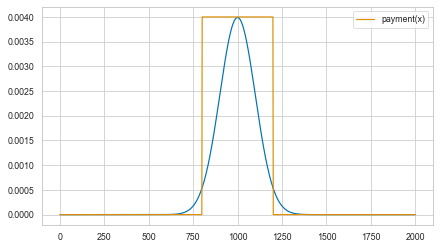

In [40]:
xs = np.linspace(0, 2000, 1000)
ys = [payment(x)/500 for x in xs]

sns.lineplot(x=xs, y=rvN.pdf(xs))
sns.lineplot(x=xs, y=ys, label="payment(x)")

## Multiple random variables

See [25d_continuous_multiple_random_vars.ipynb](./25d_continuous_multiple_random_vars.ipynb).

## Discussion

### Bulk of the normal distribution

How much of the total probability "weight" lies within $k$ standard deviations of the mean?

$$
\textrm{Pr}(\mu_N - k\sigma_N \leq N \leq \mu_N + k\sigma_N) \ = \ p_k.
$$

In [41]:
from scipy.integrate import quad
from scipy.stats import norm
rvN = norm(1000, 100)

In [42]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    I_k = [mu - k*sigma, mu + k*sigma]
    p_k = quad(rvN.pdf, *I_k)[0]
    print(f"p_{k} = Pr( N in {I_k} ) = {p_k:.3f}")

p_1 = Pr( N in [900.0, 1100.0] ) = 0.683
p_2 = Pr( N in [800.0, 1200.0] ) = 0.954
p_3 = Pr( N in [700.0, 1300.0] ) = 0.997


The code below highlights the interval $I_k$ and computes the probability $p_k$.
Change the value of $k$ to get different plots.

In [43]:
# Download the `plot_helpers.py` module from the book's main github repo:
import os, requests
if not os.path.exists("plot_helpers.py"):
    resp = requests.get("https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/notebooks/plot_helpers.py")
    with open("plot_helpers.py", "w") as f:
        f.write(resp.text)
    print("Downloaded `plot_helpers.py` module to current directory:", os.getcwd())
else:
    print("You already have plot_helpers.py, so we can proceed.")


You already have plot_helpers.py, so we can proceed.


0.9544997361036417

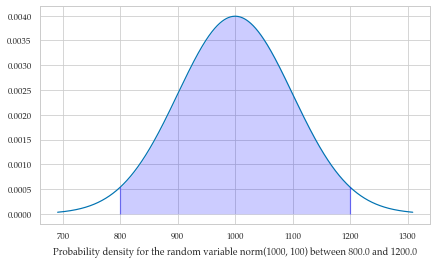

In [44]:
from plot_helpers import calc_prob_and_plot

k = 2              # number of standard deviations around the mean

# values of x in the interval 𝜇 ± k𝜎 = [𝜇-k𝜎, 𝜇+k𝜎]
I_k = [mu-k*sigma, mu+k*sigma]
p_k, _ = calc_prob_and_plot(rvN, *I_k)
p_k

Try changing the value of the variable `k` to 1 or 3 in the above code cell.

### Tails of the normal distribution

We're often interested in tail ends of the distribution, which contain the unlikely events.

In [45]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    # compute the probability in the left tail (-∞,𝜇-k𝜎]
    x_l = mu - k*sigma
    p_l = quad(rvN.pdf, rvN.ppf(0.0000000001), x_l)[0]
    # compute the probability in the right tail [𝜇+k𝜎,∞)
    x_r = mu + k*sigma
    p_r = quad(rvN.pdf, x_r, rvN.ppf(0.9999999999))[0]
    # add together to get total probability in the tails
    p_tails = p_l + p_r
    print(f"Pr( N<{x_l} or N>{x_r} ) = {p_tails:.4f}")

Pr( N<900.0 or N>1100.0 ) = 0.3173
Pr( N<800.0 or N>1200.0 ) = 0.0455
Pr( N<700.0 or N>1300.0 ) = 0.0027


The code below highlights the tails of the distribution and computes the sum of their probability.

Pr( {N<800.0} ∪ {N>1200.0} ) = 0.0455


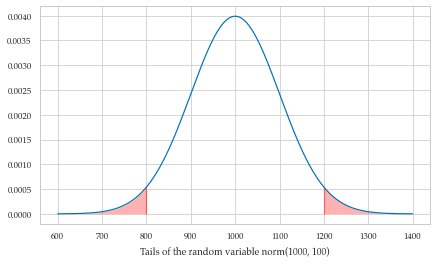

In [46]:
from plot_helpers import calc_prob_and_plot_tails

mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable


k = 2              # number of standard deviations around the mean

# the distribution's left tail (-∞,𝜇-k𝜎]
x_l = mu - k*sigma
# the distribution's right tail [𝜇+k𝜎,∞)
x_r = mu + k*sigma
p_tails, _ = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400])

print(f"Pr( {{N<{x_l}}} ∪ {{N>{x_r}}} ) = {p_tails:.4f}")

Try changing the value of the variable `k` in the above code cell.

The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $k=2$ standard deviations away from the mean (more precisely, we should use $k=1.96$ to get exactly 5%). We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.